In [66]:
import keras
from keras.datasets import mnist
from keras.layers import Dense,Activation,Dropout
from keras import Sequential
from keras.layers.normalization import BatchNormalization
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import TensorBoard
%load_ext tensorboard

In [47]:
from keras.utils import to_categorical
from keras.optimizers import Adam

In [48]:
(x_data,y_data),(x_data_val,y_data_val)=mnist.load_data()

In [49]:
x_flatten=x_data.reshape(60000,784).astype('float32')
x_val_flatten=x_data_val.reshape(10000,784).astype('float32')

In [50]:
x_flatten/=255
x_val_flatten/=255

In [51]:
x_train=x_flatten
x_valid=x_val_flatten

In [52]:
n_classes=10
y_train=to_categorical(y_data,n_classes)
y_valid=to_categorical(y_data_val,n_classes)

In [55]:
model=Sequential([
    Dense(64,input_dim=784),
    Activation('relu'),
    BatchNormalization(),
    
    Dense(64),
    Activation('relu'),
    BatchNormalization(),
    
    Dense(64),
    Activation('relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(10),
    Activation('softmax'),
    
])

In [56]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 64)                50240     
_________________________________________________________________
activation_14 (Activation)   (None, 64)                0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 64)                256       
_________________________________________________________________
dense_15 (Dense)             (None, 64)                4160      
_________________________________________________________________
activation_15 (Activation)   (None, 64)                0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 64)                256       
_________________________________________________________________
dense_16 (Dense)             (None, 64)               

In [57]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [67]:
tensorboard=TensorBoard('logs/deep-net-samp')

In [68]:
model.fit(x_train,y_train,batch_size=128,epochs=20,verbose=1,validation_data=(x_valid,y_valid),callbacks=[tensorboard])

Epoch 1/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0101 - accuracy: 0.9966 - val_loss: 0.1084 - val_accuracy: 0.9788
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0108 - accuracy: 0.9965 - val_loss: 0.1138 - val_accuracy: 0.9760
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0094 - accuracy: 0.9967 - val_loss: 0.1110 - val_accuracy: 0.9789
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0095 - accuracy: 0.9967 - val_loss: 0.1006 - val_accuracy: 0.9788
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0087 - accuracy: 0.9970 - val_loss: 0.1070 - val_accuracy: 0.9781
Epoch 6/20
469/469 [==============================] - 5s 12ms/step - loss: 0.0115 - accuracy: 0.9962 - val_loss: 0.1100 - val_accuracy: 0.9785
Epoch 7/20
469/469 [==============================] - 5s 12ms/step - loss: 0.0114 - accuracy: 0.9964 - val_loss: 0.1081 - val_accuracy: 0.9782

In [70]:
%tensorboard --logdir='logs/deep-net-samp'


#python -m tensorboard.main --logdir=[PATH_TO_LOGDIR]
#run in terminal

ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.

In [20]:
model.evaluate(x_valid,y_valid)

313/313 [==============================] - 1s 3ms/step - loss: 0.0945 - accuracy: 0.9773


[0.09454591572284698, 0.9772999882698059]

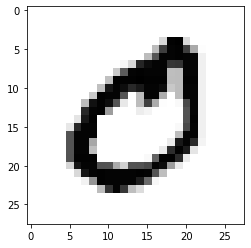

In [22]:
plt.imshow(x_data[21],cmap='Greys')

In [25]:
x_train[21].shape

(784,)

In [31]:
x_sam=x_train[21].reshape(1,784).astype('float32')

In [35]:
model.predict(x_sam)

array([[9.9998116e-01, 1.2681804e-08, 1.7249365e-09, 1.4675698e-08,
        3.1088812e-10, 3.9476607e-08, 1.8868168e-05, 1.8777021e-08,
        6.8367418e-09, 1.3751528e-09]], dtype=float32)

In [34]:
np.argmax(model.predict(x_sam),axis=-1)

array([0], dtype=int64)

In [36]:
model.evaluate(x_train,y_train)

1875/1875 [==============================] - 10s 5ms/step - loss: 0.0102 - accuracy: 0.9969


[0.010182430036365986, 0.9968666434288025]

In [37]:
from keras.datasets import boston_housing

In [38]:
(x_train,y_train),(x_valid,y_valid)=boston_housing.load_data()

57344/57026 [==============================] - 1s 20us/step


In [41]:
model=Sequential([
    Dense(32,input_dim=13),
    Activation('relu'),
    BatchNormalization(),
    
    Dense(16),
    Activation('relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(1),
    Activation('linear'),
    
])

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32)                448       
_________________________________________________________________
activation_7 (Activation)    (None, 32)                0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 32)                128       
_________________________________________________________________
dense_8 (Dense)              (None, 16)                528       
_________________________________________________________________
activation_8 (Activation)    (None, 16)                0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 16)                64        
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)               

In [43]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [44]:
model.fit(x_train,y_train,batch_size=8,epochs=32,verbose=1,validation_data=(x_valid,y_valid))

Epoch 1/32
51/51 [==============================] - 4s 16ms/step - loss: 581.3937 - val_loss: 594.1721
Epoch 2/32
51/51 [==============================] - 0s 6ms/step - loss: 530.0461 - val_loss: 600.7190
Epoch 3/32
51/51 [==============================] - 0s 6ms/step - loss: 561.8424 - val_loss: 583.2975
Epoch 4/32
51/51 [==============================] - 0s 6ms/step - loss: 520.5043 - val_loss: 541.3059
Epoch 5/32
51/51 [==============================] - 0s 6ms/step - loss: 547.9512 - val_loss: 521.6421
Epoch 6/32
51/51 [==============================] - 0s 6ms/step - loss: 488.6299 - val_loss: 482.0515
Epoch 7/32
51/51 [==============================] - 0s 6ms/step - loss: 429.3952 - val_loss: 458.5703
Epoch 8/32
51/51 [==============================] - 0s 6ms/step - loss: 400.0586 - val_loss: 422.5670
Epoch 9/32
51/51 [==============================] - 0s 6ms/step - loss: 352.9823 - val_loss: 400.4570
Epoch 10/32
51/51 [==============================] - 0s 6ms/step - loss: 335.6815

In [45]:
model.predict(np.reshape(x_valid[42],[1,13]))

array([[21.56247]], dtype=float32)